In [98]:
#그래프 한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (6,383 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128288 files and di

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [20]:
#그래프 한글깨짐 방지
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 



---
#날씨 데이터 (미세먼지)


In [2]:
from google.colab import drive
drive.mount('/content/drive')
dust19 = pd.read_csv('/content/drive/MyDrive/2019(3-5)dust.csv',encoding='euc-kr')
dust20 = pd.read_csv('/content/drive/MyDrive/2020(3-5)dust.csv',encoding='euc-kr')
dust21 = pd.read_csv('/content/drive/MyDrive/2021(3-5)dust.csv',encoding='euc-kr')
dust22 = pd.read_csv('/content/drive/MyDrive/2022(3-5)dust.csv',encoding='euc-kr')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 결측치 체크 & 지점 column drop

In [3]:
dust19.isna().sum()

지점                   0
지점명                  0
일시                   0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64

In [47]:
dust19 = dust19.drop('지점', axis = 'columns')
dust19

,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,속초,2019-03-01 01:00,46
1,속초,2019-03-01 02:00,52
2,속초,2019-03-01 03:00,60
3,속초,2019-03-01 04:00,67
4,속초,2019-03-01 05:00,71
...,...,...,...
59907,연평도,2019-05-30 20:00,30
59908,연평도,2019-05-30 21:00,33
59909,연평도,2019-05-30 22:00,33
59910,연평도,2019-05-30 23:00,23


In [4]:
dust20.isna().sum()

지점                   0
지점명                  0
일시                   0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64

In [56]:
dust20 = dust20.drop('지점', axis = 'columns')
dust20

,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,속초,2020-03-01 01:00,5
1,속초,2020-03-01 02:00,13
2,속초,2020-03-01 03:00,6
3,속초,2020-03-01 04:00,10
4,속초,2020-03-01 05:00,11
...,...,...,...
59036,연평도,2020-05-30 20:00,29
59037,연평도,2020-05-30 21:00,11
59038,연평도,2020-05-30 22:00,4
59039,연평도,2020-05-30 23:00,3


In [5]:
dust21.isna().sum()

지점                   0
지점명                  0
일시                   0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64

In [57]:
dust21 = dust21.drop('지점', axis = 'columns')
dust21

,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,속초,2021-03-01 01:00,18
1,속초,2021-03-01 02:00,14
2,속초,2021-03-01 03:00,16
3,속초,2021-03-01 04:00,19
4,속초,2021-03-01 05:00,10
...,...,...,...
57733,연평도,2021-05-30 20:00,18
57734,연평도,2021-05-30 21:00,16
57735,연평도,2021-05-30 22:00,10
57736,연평도,2021-05-30 23:00,19


In [6]:
dust22.isna().sum()

지점                   0
지점명                  0
일시                   0
1시간평균 미세먼지농도(㎍/㎥)    0
dtype: int64

In [58]:
dust22 = dust22.drop('지점', axis = 'columns')
dust22

,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,속초,2022-03-01 01:00,28
1,속초,2022-03-01 02:00,34
2,속초,2022-03-01 03:00,30
3,속초,2022-03-01 04:00,24
4,속초,2022-03-01 05:00,23
...,...,...,...
58203,연평도,2022-05-30 18:00,14
58204,연평도,2022-05-30 19:00,21
58205,연평도,2022-05-30 20:00,15
58206,연평도,2022-05-30 21:00,12


- 지역 : array(['속초', '북춘천', '광덕산', '대관령', '백령도', '서울', '울릉도독도(감)', '관악산', '수원', '영월', '울진', '안면도(감)', '추풍령', '안동', '군산', '대구', '전주', '울산', '광주', '구덕산', '흑산도', '고산', '진주', '강화', '북격렬비도', '천안', '진도군', '문경', '연평도'],)

- 전국 미세먼지농도 평균

In [59]:
print('2019년 전국 미세먼지농도 평균 : ', dust19['1시간평균 미세먼지농도(㎍/㎥)'].mean())
print('2020년 전국 미세먼지농도 평균 : ', dust20['1시간평균 미세먼지농도(㎍/㎥)'].mean())
print('2021년 전국 미세먼지농도 평균 : ', dust21['1시간평균 미세먼지농도(㎍/㎥)'].mean())
print('2022년 전국 미세먼지농도 평균 : ', dust22['1시간평균 미세먼지농도(㎍/㎥)'].mean())

2019년 전국 미세먼지농도 평균 :  39.097760048070505
2020년 전국 미세먼지농도 평균 :  31.6323233007571
2021년 전국 미세먼지농도 평균 :  49.498164120683086
2022년 전국 미세먼지농도 평균 :  32.144636476085765


- melt 이용

In [104]:
dust19_sp= dust19.melt(id_vars=['지점명','일시'],value_vars=['1시간평균 미세먼지농도(㎍/㎥)'])
dust19_sp.query("지점명=='서울'")

,지점명,일시,variable,value
10350,서울,2019-03-01 01:00,1시간평균 미세먼지농도(㎍/㎥),105
10351,서울,2019-03-01 02:00,1시간평균 미세먼지농도(㎍/㎥),99
10352,서울,2019-03-01 03:00,1시간평균 미세먼지농도(㎍/㎥),107
10353,서울,2019-03-01 04:00,1시간평균 미세먼지농도(㎍/㎥),120
10354,서울,2019-03-01 05:00,1시간평균 미세먼지농도(㎍/㎥),129
...,...,...,...,...
12462,서울,2019-05-30 20:00,1시간평균 미세먼지농도(㎍/㎥),43
12463,서울,2019-05-30 21:00,1시간평균 미세먼지농도(㎍/㎥),53
12464,서울,2019-05-30 22:00,1시간평균 미세먼지농도(㎍/㎥),48
12465,서울,2019-05-30 23:00,1시간평균 미세먼지농도(㎍/㎥),27


<Axes: xlabel='일시'>

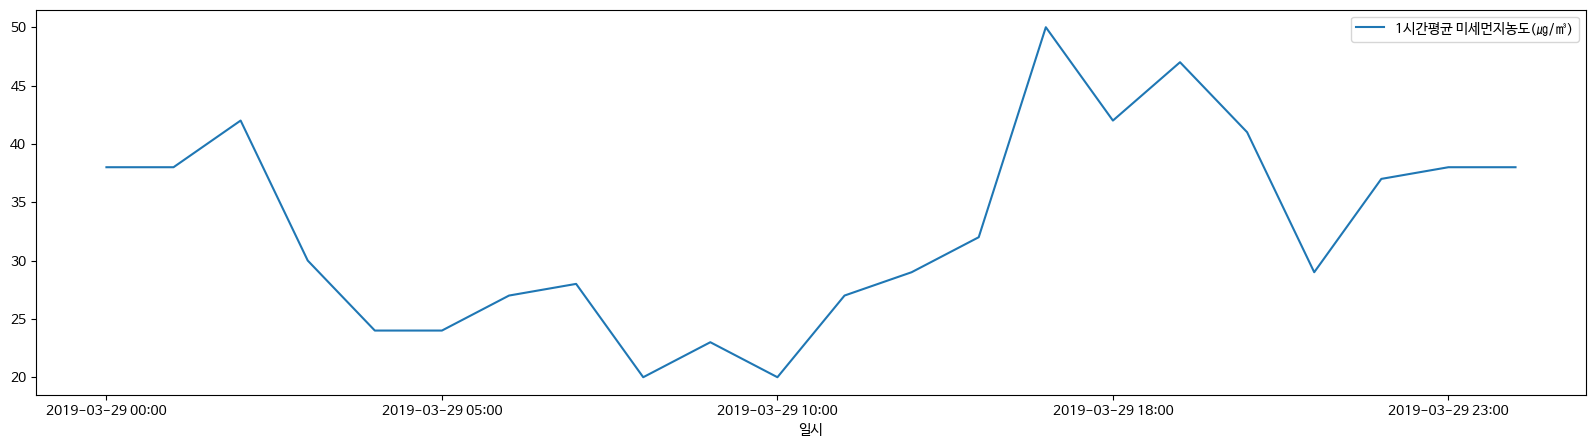

In [107]:
#19년 3월 29일 서울 시간별 미세먼지
dust19_seoul = dust19.query("지점명=='서울'")
dust19_seoul.query("일시>='2019-03-29 00:00' and 일시<='2019-03-30 00:00'").plot(x='일시',y='1시간평균 미세먼지농도(㎍/㎥)',figsize=(20,5))

<Axes: xlabel='일시'>

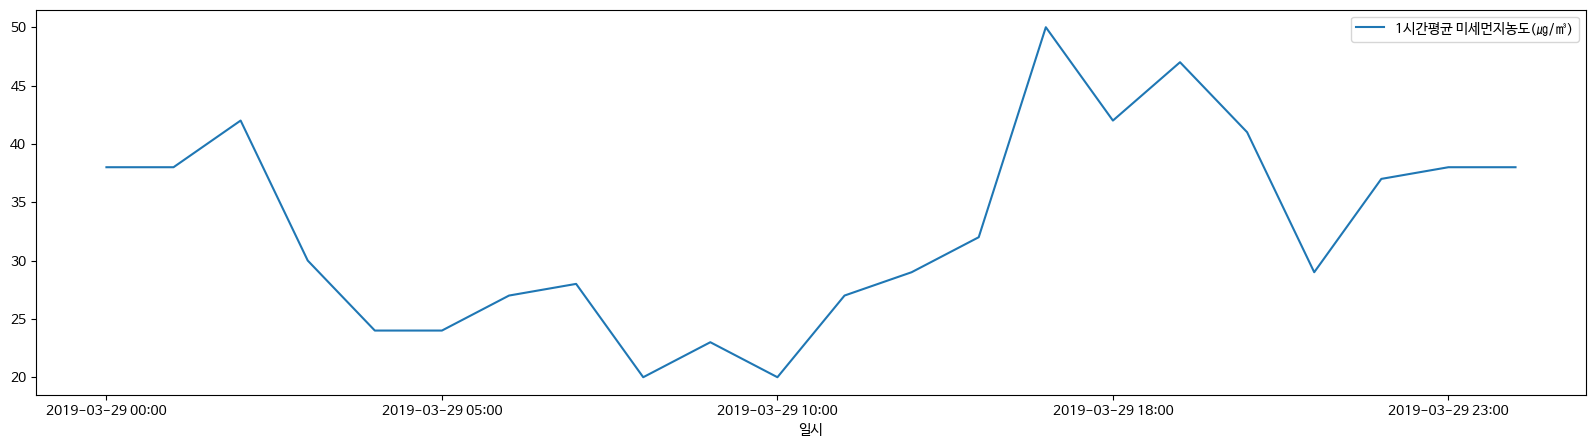

In [63]:
#19년 3월 29일 서울 시간별 미세먼지
dust19_seoul = dust19.query("지점명=='서울'")
dust19_seoul.query("일시>='2019-03-29 00:00' and 일시<='2019-03-30 00:00'").plot(x='일시',y='1시간평균 미세먼지농도(㎍/㎥)',figsize=(20,5))

In [64]:
dust20_sp= dust20.melt(id_vars=['지점명'],value_vars=['1시간평균 미세먼지농도(㎍/㎥)'])
dust20_sp.query("지점명=='서울'")

,지점명,variable,value
9998,서울,1시간평균 미세먼지농도(㎍/㎥),40
9999,서울,1시간평균 미세먼지농도(㎍/㎥),42
10000,서울,1시간평균 미세먼지농도(㎍/㎥),42
10001,서울,1시간평균 미세먼지농도(㎍/㎥),41
10002,서울,1시간평균 미세먼지농도(㎍/㎥),37
...,...,...,...
12127,서울,1시간평균 미세먼지농도(㎍/㎥),45
12128,서울,1시간평균 미세먼지농도(㎍/㎥),45
12129,서울,1시간평균 미세먼지농도(㎍/㎥),32
12130,서울,1시간평균 미세먼지농도(㎍/㎥),28


<Axes: xlabel='일시'>

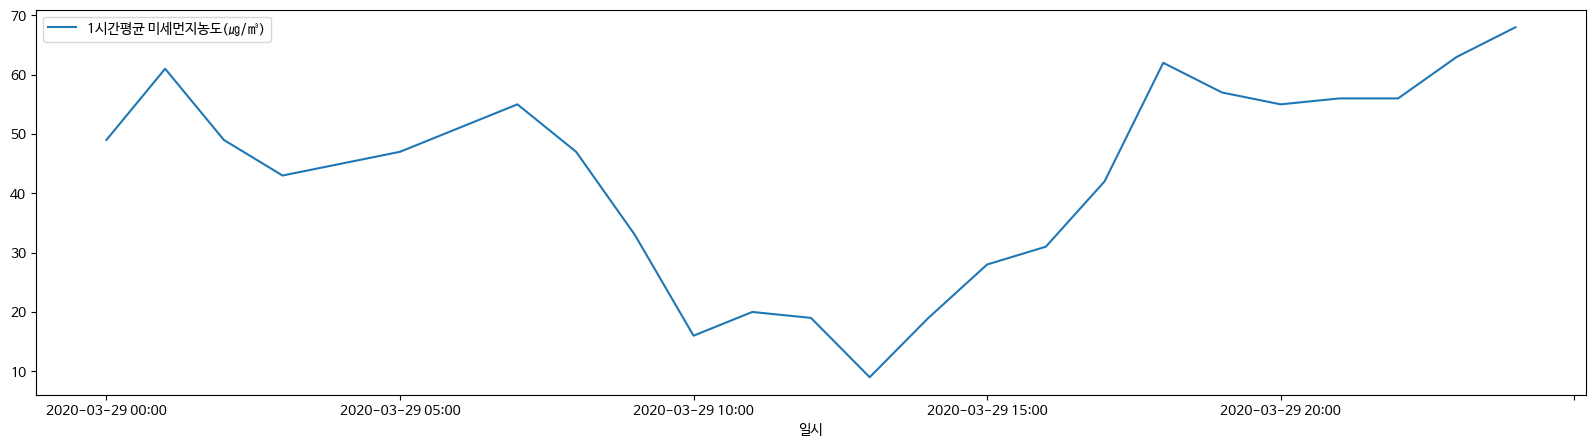

In [65]:
#20년 3월 29일 서울 시간별 미세먼지
dust20_seoul = dust20.query("지점명=='서울'")
dust20_seoul.query("일시>='2020-03-29 00:00' and 일시<='2020-03-30 00:00'").plot(x='일시',y='1시간평균 미세먼지농도(㎍/㎥)',figsize=(20,5))

In [66]:
dust21_sp= dust21.melt(id_vars=['지점명'],value_vars=['1시간평균 미세먼지농도(㎍/㎥)'])
dust21_sp.query("지점명=='서울'")

,지점명,variable,value
9975,서울,1시간평균 미세먼지농도(㎍/㎥),48
9976,서울,1시간평균 미세먼지농도(㎍/㎥),43
9977,서울,1시간평균 미세먼지농도(㎍/㎥),38
9978,서울,1시간평균 미세먼지농도(㎍/㎥),54
9979,서울,1시간평균 미세먼지농도(㎍/㎥),76
...,...,...,...
12043,서울,1시간평균 미세먼지농도(㎍/㎥),27
12044,서울,1시간평균 미세먼지농도(㎍/㎥),43
12045,서울,1시간평균 미세먼지농도(㎍/㎥),44
12046,서울,1시간평균 미세먼지농도(㎍/㎥),43


<Axes: xlabel='일시'>

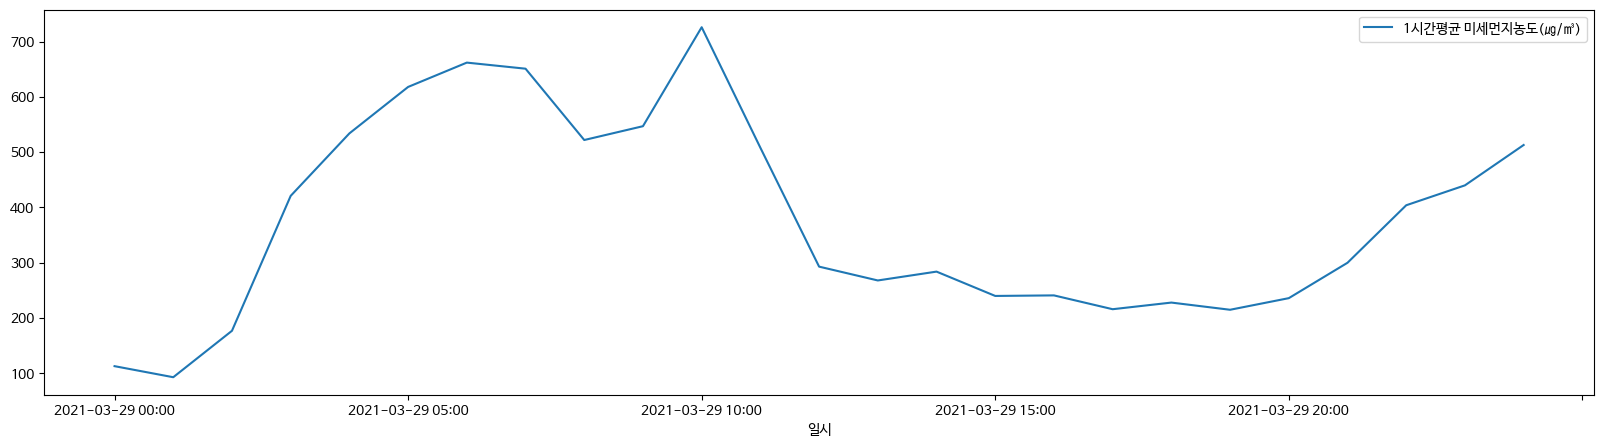

In [67]:
#21년 3월 29일 서울 시간별 미세먼지
dust21_seoul = dust21.query("지점명=='서울'")
dust21_seoul.query("일시>='2021-03-29 00:00' and 일시<='2021-03-30 00:00'").plot(x='일시',y='1시간평균 미세먼지농도(㎍/㎥)',figsize=(20,5))

In [68]:
dust22_sp= dust22.melt(id_vars=['지점명'],value_vars=['1시간평균 미세먼지농도(㎍/㎥)'])
dust22_sp.query("지점명=='서울'")

,지점명,variable,value
10033,서울,1시간평균 미세먼지농도(㎍/㎥),35
10034,서울,1시간평균 미세먼지농도(㎍/㎥),32
10035,서울,1시간평균 미세먼지농도(㎍/㎥),31
10036,서울,1시간평균 미세먼지농도(㎍/㎥),29
10037,서울,1시간평균 미세먼지농도(㎍/㎥),26
...,...,...,...
12063,서울,1시간평균 미세먼지농도(㎍/㎥),6
12064,서울,1시간평균 미세먼지농도(㎍/㎥),5
12065,서울,1시간평균 미세먼지농도(㎍/㎥),6
12066,서울,1시간평균 미세먼지농도(㎍/㎥),9


<Axes: xlabel='일시'>

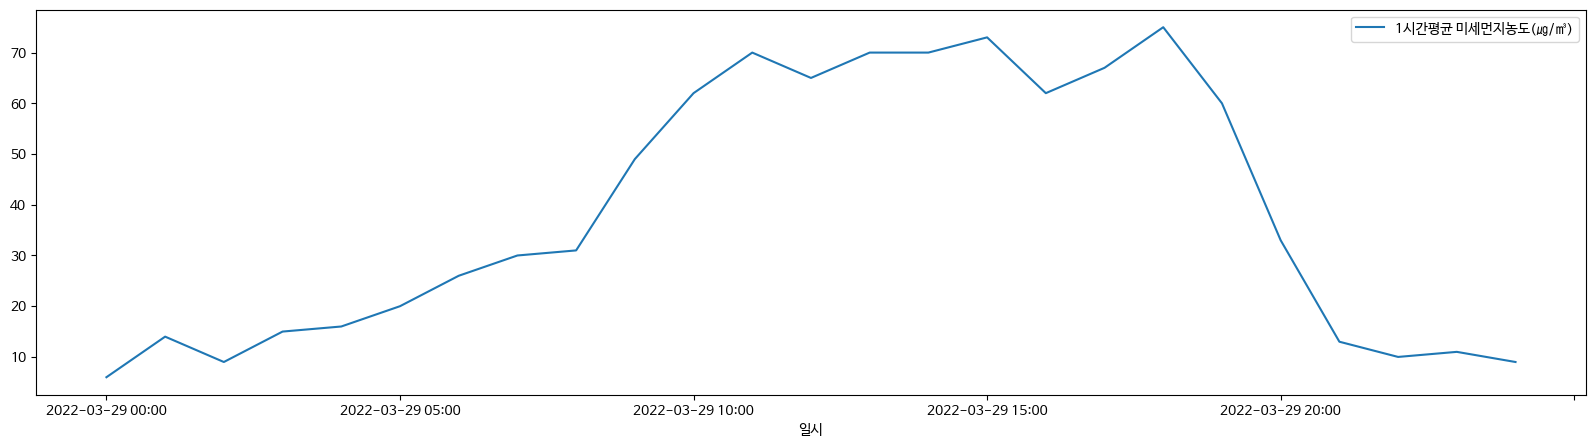

In [69]:
#22년 3월 29일 서울 시간별 미세먼지
dust22_seoul = dust22.query("지점명=='서울'")
dust22_seoul.query("일시>='2022-03-29 00:00' and 일시<='2022-03-30 00:00'").plot(x='일시',y='1시간평균 미세먼지농도(㎍/㎥)',figsize=(20,5))

In [70]:
print('19년도 서울 미세먼지 평균 : ',dust19_sp.query("지점명=='서울'").mean())
print('20년도 서울 미세먼지 평균 : ',dust20_sp.query("지점명=='서울'").mean())
print('21년도 서울 미세먼지 평균 : ',dust21_sp.query("지점명=='서울'").mean())
print('22년도 서울 미세먼지 평균 : ',dust22_sp.query("지점명=='서울'").mean())

19년도 서울 미세먼지 평균 :  value    51.322626
dtype: float64
20년도 서울 미세먼지 평균 :  value    44.528116
dtype: float64
21년도 서울 미세먼지 평균 :  value    72.160154
dtype: float64
22년도 서울 미세먼지 평균 :  value    43.650123
dtype: float64


<ipython-input-70-9882e27076e5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('19년도 서울 미세먼지 평균 : ',dust19_sp.query("지점명=='서울'").mean())
<ipython-input-70-9882e27076e5>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('20년도 서울 미세먼지 평균 : ',dust20_sp.query("지점명=='서울'").mean())
<ipython-input-70-9882e27076e5>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print('21년도 서울 미세먼지 평균 : ',dust21_sp.query("지점명=='서울'").mean())
<ipython-input-70-9882e27076e5>:4: FutureWarning: Dropp

In [71]:
#시간별 19년도 전국 미세먼지 비교
dust19_pivot = dust19.pivot_table(dust19, index = '일시', columns='지점명')
dust19_pivot

1시간평균 미세먼지농도(㎍/㎥)                                          \
지점명                             강화     고산   관악산    광덕산     광주   구덕산     군산   
일시                                                                           
2019-03-01 01:00              40.0  140.0  87.0   74.0  121.0  56.0  162.0   
2019-03-01 02:00              52.0  129.0  79.0   73.0  136.0  75.0  166.0   
2019-03-01 03:00              42.0  113.0  73.0   71.0  133.0  63.0  136.0   
2019-03-01 04:00              36.0   96.0  67.0   68.0  131.0  62.0   75.0   
2019-03-01 05:00              36.0  117.0  48.0   69.0  122.0  69.0   59.0   
...                            ...    ...   ...    ...    ...   ...    ...   
2019-05-30 20:00              29.0   22.0  42.0   94.0   10.0   6.0   27.0   
2019-05-30 21:00              25.0   33.0  26.0  156.0   22.0  15.0   28.0   
2019-05-30 22:00              18.0   31.0  15.0   90.0   30.0  19.0   23.0   
2019-05-30 23:00              16.0   29.0   7.0  164.0   38.0  14.0   16.0   
2019-05-31 00:00               9.0   14.0   8.0   50.0   29.0  36.0   13.0   

                                      ...                                     \
지점명                 대관령    대구     문경  ...     영월 울릉도독도(감)    울산    울진     전주   
일시                                    ...                                      
2019-03-01 01:00  119.0  65.0  137.0  ...  120.0     31.0  68.0  37.0  232.0   
2019-03-01 02:00  117.0  79.0  149.0  ...  122.0     44.0  68.0  59.0  258.0   
2019-03-01 03:00   93.0  75.0  133.0  ...  114.0     37.0  69.0  56.0  293.0   
2019-03-01 04:00   98.0  74.0  122.0  ...  106.0     38.0  61.0  57.0  225.0   
2019-03-01 05:00   85.0  75.0  112.0  ...  104.0     38.0  71.0  61.0  236.0   
...                 ...   ...    ...  ...    ...      ...   ...   ...    ...   
2019-05-30 20:00   75.0  32.0   29.0  ...   28.0     33.0  29.0  31.0   27.0   
2019-05-30 21:00   19.0  28.0   39.0  ...   33.0     40.0  31.0  29.0   35.0   
2019-05-30 22:00   46.0  26.0   49.0  ...   35.0     32.0  31.0  33.0   37.0   
2019-05-30 23:00   44.0  30.0   35.0  ...   39.0     31.0  29.0  32.0   34.0   
2019-05-31 00:00   38.0  30.0   35.0  ...   29.0     26.0  24.0  45.0   34.0   

                                                  
지점명                진도군    진주     천안    추풍령   흑산도  
일시                                                
2019-03-01 01:00   NaN  49.0  138.0  129.0  93.0  
2019-03-01 02:00   NaN  53.0  117.0  145.0  99.0  
2019-03-01 03:00   NaN  60.0  103.0  137.0  84.0  
2019-03-01 04:00   NaN  64.0   96.0  142.0  77.0  
2019-03-01 05:00   NaN  68.0   85.0  152.0  70.0  
...                ...   ...    ...    ...   ...  
2019-05-30 20:00  46.0  27.0   42.0   25.0   6.0  
2019-05-30 21:00  42.0  17.0   44.0   21.0   9.0  
2019-05-30 22:00  45.0  13.0   39.0   19.0   NaN  
2019-05-30 23:00  37.0  14.0   28.0   15.0  14.0  
2019-05-31 00:00  27.0  15.0   14.0    5.0  12.0  

[2184 rows x 29 columns]

<Axes: ylabel='None,지점명'>

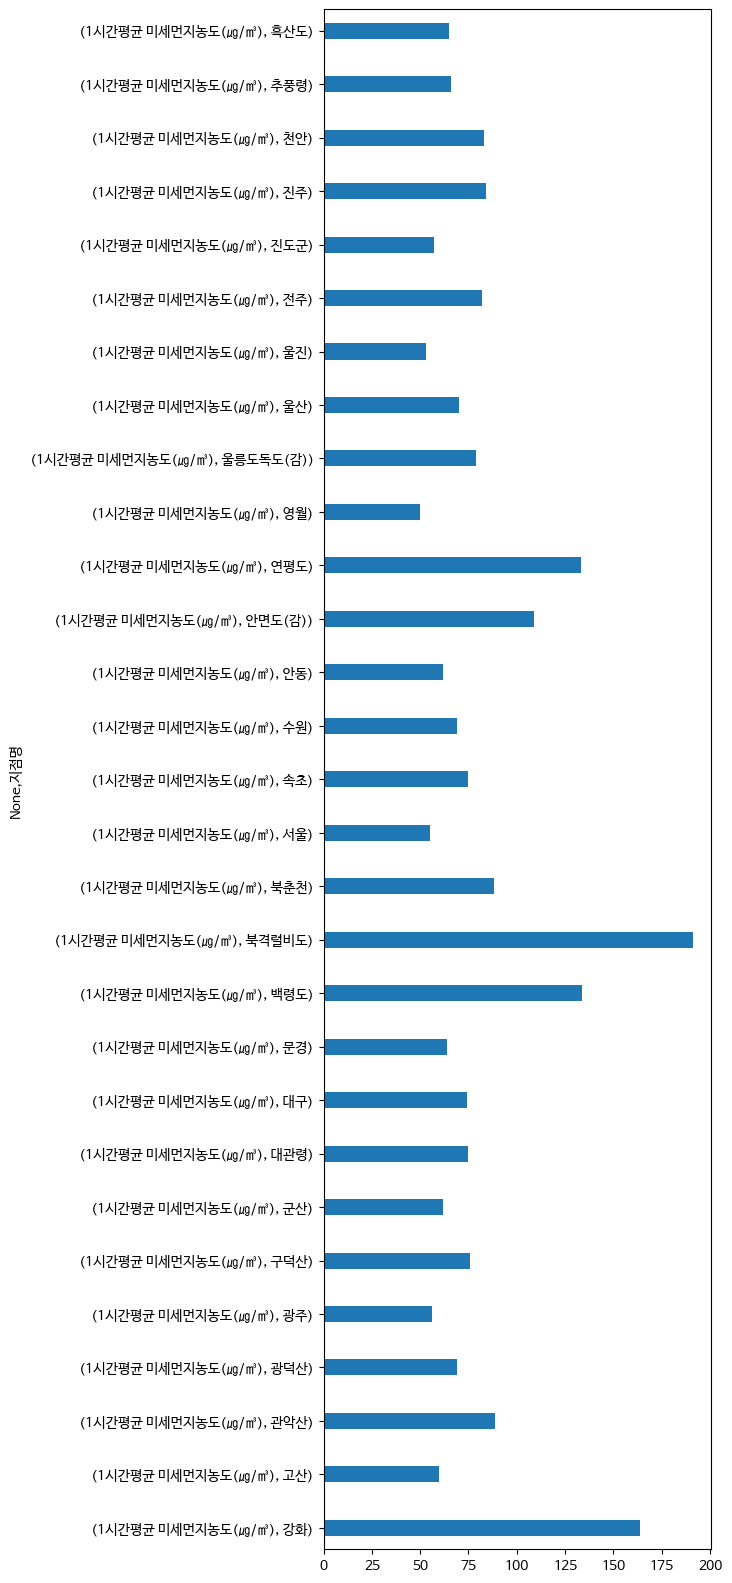

In [108]:
#결측치 제거
d19 = dust19_pivot.fillna(method='bfill')
#2019년 4월 5일 13시 미세먼지 농도 그래프
d19.loc['2019-04-05 13:00'].plot.barh(width=0.3, figsize=(5,20))

In [73]:
#시간별 20년도 전국 미세먼지 비교
dust20_pivot = dust20.pivot_table(dust20, index = '일시', columns='지점명')
dust20_pivot

1시간평균 미세먼지농도(㎍/㎥)                                            \
지점명                             강화    고산   관악산   광덕산    광주   구덕산    군산   대관령   
일시                                                                             
2020-03-01 01:00              23.0  16.0  12.0   NaN  31.0  14.0  20.0  21.0   
2020-03-01 02:00              27.0  13.0  18.0   5.0  27.0  14.0  15.0  25.0   
2020-03-01 03:00              28.0   8.0  29.0   7.0  23.0  17.0  22.0  14.0   
2020-03-01 04:00              28.0  14.0  26.0  14.0  21.0  19.0  18.0  14.0   
2020-03-01 05:00              28.0  12.0  31.0  16.0   9.0  17.0  26.0  15.0   
...                            ...   ...   ...   ...   ...   ...   ...   ...   
2020-05-30 20:00              31.0  13.0  35.0  11.0  26.0   NaN  31.0   NaN   
2020-05-30 21:00              23.0  10.0   NaN  16.0  27.0   NaN  38.0  34.0   
2020-05-30 22:00              18.0  14.0  22.0  16.0  31.0   NaN  38.0   NaN   
2020-05-30 23:00              22.0   9.0  23.0  23.0  23.0   NaN  37.0  18.0   
2020-05-31 00:00              33.0  15.0  15.0  27.0  30.0   NaN  39.0   NaN   

                              ...                                         \
지점명                 대구    문경  ...    영월 울릉도독도(감)    울산    울진    전주   진도군   
일시                            ...                                          
2020-03-01 01:00  19.0   9.0  ...  19.0     10.0  16.0  29.0  50.0  32.0   
2020-03-01 02:00  29.0  11.0  ...  36.0     15.0  19.0  15.0  49.0  33.0   
2020-03-01 03:00  30.0  18.0  ...  39.0     16.0  19.0  27.0  52.0  29.0   
2020-03-01 04:00  28.0  27.0  ...  34.0     12.0  17.0  19.0  51.0  41.0   
2020-03-01 05:00  22.0  28.0  ...  21.0     15.0  16.0  23.0  45.0  31.0   
...                ...   ...  ...   ...      ...   ...   ...   ...   ...   
2020-05-30 20:00  31.0  27.0  ...  26.0     12.0  27.0  18.0  55.0  32.0   
2020-05-30 21:00  23.0  27.0  ...  25.0      NaN  23.0  32.0  53.0  37.0   
2020-05-30 22:00  19.0  20.0  ...  19.0      NaN  28.0  12.0  48.0  33.0   
2020-05-30 23:00  17.0  20.0  ...  17.0     10.0  17.0  23.0  53.0  34.0   
2020-05-31 00:00  12.0  16.0  ...  14.0     13.0  25.0   NaN  45.0  41.0   

                                          
지점명                 진주    천안   추풍령   흑산도  
일시                                        
2020-03-01 01:00   9.0  45.0  21.0   5.0  
2020-03-01 02:00  14.0  38.0  10.0  11.0  
2020-03-01 03:00  10.0  38.0   8.0  11.0  
2020-03-01 04:00  12.0  33.0  11.0  20.0  
2020-03-01 05:00  13.0  30.0  14.0  14.0  
...                ...   ...   ...   ...  
2020-05-30 20:00  27.0  64.0   NaN  20.0  
2020-05-30 21:00  28.0  49.0   NaN  26.0  
2020-05-30 22:00  27.0  47.0   NaN  27.0  
2020-05-30 23:00  29.0  36.0   NaN  26.0  
2020-05-31 00:00  21.0  38.0   NaN  25.0  

[2180 rows x 29 columns]

<Axes: ylabel='None,지점명'>

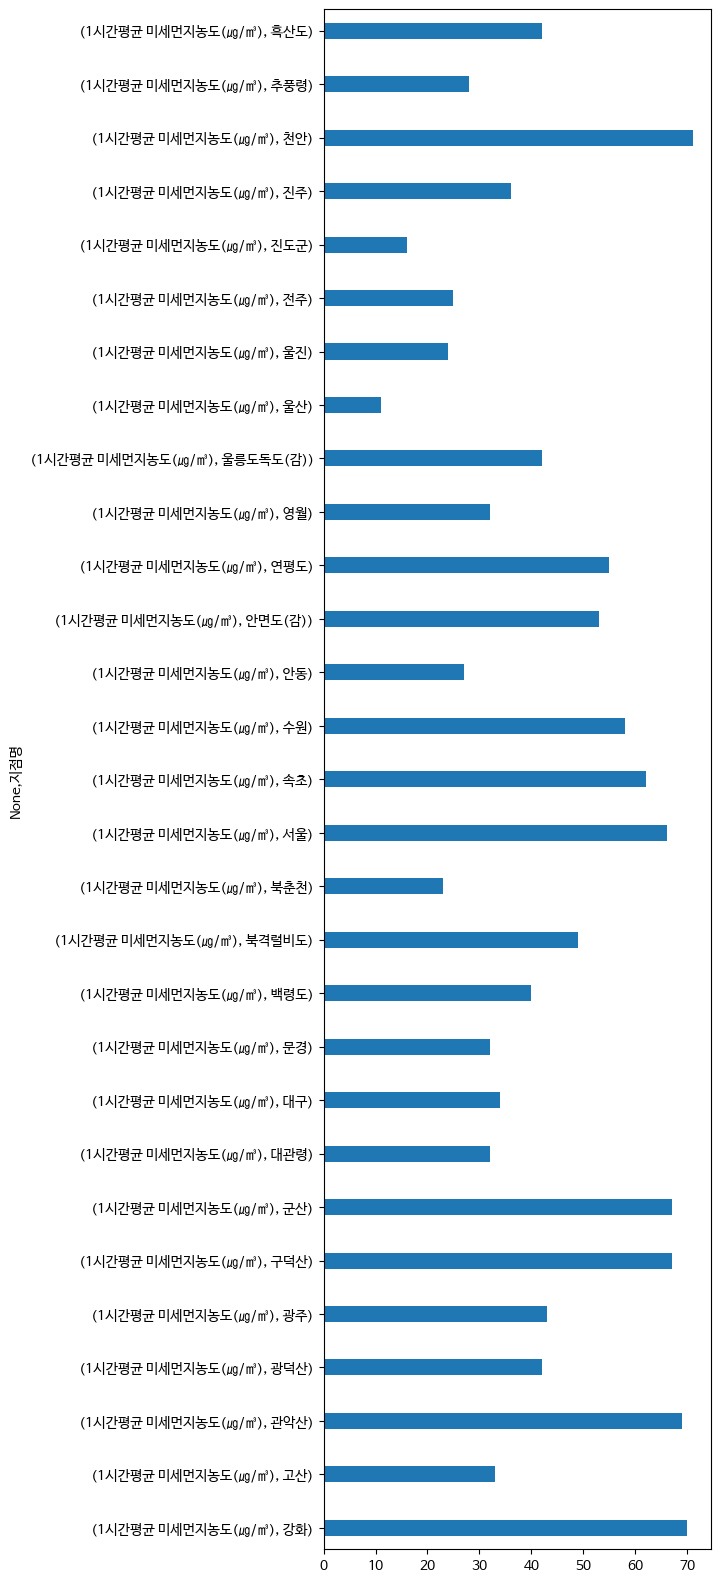

In [109]:
#결측치 제거
d20 = dust20_pivot.fillna(method='bfill')
#2019년 4월 5일 13시 미세먼지 농도 그래프
d20.loc['2020-04-05 13:00'].plot.barh(width=0.3, figsize=(5,20))

In [76]:
#시간별 21년도 전국 미세먼지 비교
dust21_pivot = dust21.pivot_table(dust21, index = '일시', columns='지점명')
dust21_pivot

1시간평균 미세먼지농도(㎍/㎥)                                            \
지점명                             강화    고산   관악산   광덕산    광주   구덕산    군산   대관령   
일시                                                                             
2021-03-01 01:00              75.0  34.0  22.0   NaN  13.0   8.0  31.0  11.0   
2021-03-01 02:00              59.0  58.0  28.0  16.0  18.0  11.0  27.0  15.0   
2021-03-01 03:00              47.0  55.0  31.0  13.0  12.0  18.0  24.0  14.0   
2021-03-01 04:00              28.0  81.0  35.0  13.0  15.0  12.0  17.0  30.0   
2021-03-01 05:00              25.0  87.0  30.0  14.0  15.0   8.0  24.0   NaN   
...                            ...   ...   ...   ...   ...   ...   ...   ...   
2021-05-30 20:00              38.0  18.0   NaN   NaN  31.0   NaN  17.0  15.0   
2021-05-30 21:00              29.0   8.0   NaN   NaN  28.0   NaN  20.0  20.0   
2021-05-30 22:00               NaN   NaN   NaN  11.0  26.0   NaN  29.0  11.0   
2021-05-30 23:00               NaN   NaN   NaN   NaN  21.0   NaN  36.0  17.0   
2021-05-31 00:00              13.0   NaN   NaN  20.0  16.0   9.0  28.0  10.0   

                              ...                                         \
지점명                 대구    문경  ...    영월 울릉도독도(감)    울산    울진    전주   진도군   
일시                            ...                                          
2021-03-01 01:00  16.0  36.0  ...  34.0     22.0  21.0   4.0  13.0  18.0   
2021-03-01 02:00  15.0  21.0  ...  23.0     20.0  24.0  15.0   NaN  20.0   
2021-03-01 03:00  18.0  24.0  ...  28.0     19.0  25.0  13.0  23.0  19.0   
2021-03-01 04:00  16.0  24.0  ...  25.0     18.0  25.0  11.0  15.0  28.0   
2021-03-01 05:00  16.0  24.0  ...  20.0     17.0  27.0   7.0   7.0  24.0   
...                ...   ...  ...   ...      ...   ...   ...   ...   ...   
2021-05-30 20:00  25.0  49.0  ...  56.0     19.0  25.0  23.0  38.0  32.0   
2021-05-30 21:00  20.0  36.0  ...  49.0      7.0  29.0  16.0  43.0  31.0   
2021-05-30 22:00  19.0  31.0  ...  37.0     10.0  24.0  15.0  47.0  34.0   
2021-05-30 23:00  23.0  30.0  ...  42.0     11.0  30.0  10.0  40.0  32.0   
2021-05-31 00:00  27.0  23.0  ...  24.0     10.0  25.0   9.0  37.0  38.0   

                                          
지점명                 진주    천안   추풍령   흑산도  
일시                                        
2021-03-01 01:00  18.0  24.0  10.0  20.0  
2021-03-01 02:00  12.0  28.0   9.0  16.0  
2021-03-01 03:00  17.0  31.0  20.0  25.0  
2021-03-01 04:00  15.0  28.0  20.0  26.0  
2021-03-01 05:00  17.0  17.0  22.0  21.0  
...                ...   ...   ...   ...  
2021-05-30 20:00  27.0  57.0  23.0   NaN  
2021-05-30 21:00  31.0  51.0  13.0   NaN  
2021-05-30 22:00  35.0  37.0  19.0   NaN  
2021-05-30 23:00  30.0  24.0  19.0   NaN  
2021-05-31 00:00  25.0  17.0  20.0   NaN  

[2184 rows x 29 columns]

<Axes: ylabel='None,지점명'>

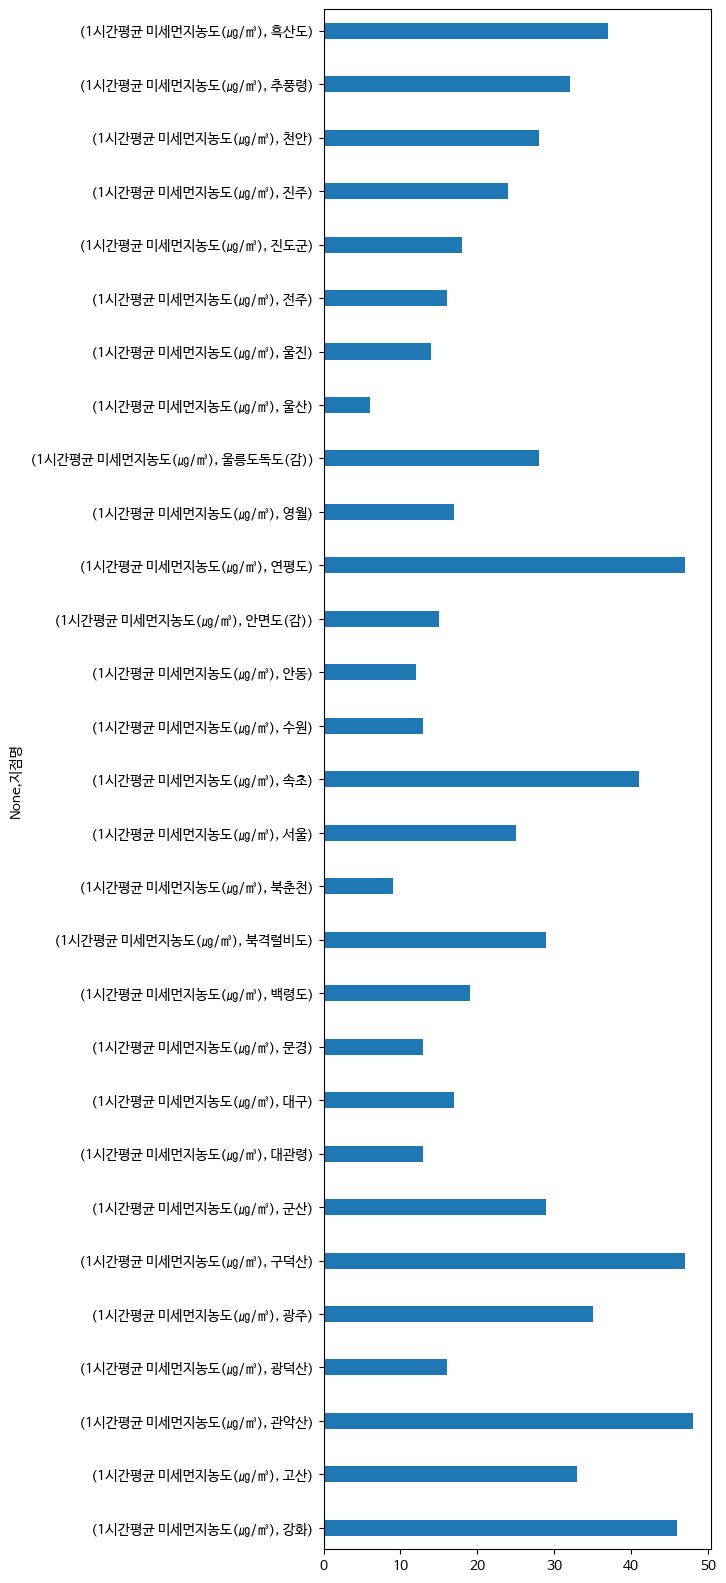

In [110]:
#결측치 제거
d21 = dust21_pivot.fillna(method='bfill')
#2019년 4월 5일 13시 미세먼지 농도 그래프
d21.loc['2021-04-05 13:00'].plot.barh(width=0.3, figsize=(5,20))

In [78]:
#시간별 22년도 전국 미세먼지 비교
dust22_pivot = dust22.pivot_table(dust22, index = '일시', columns='지점명')
dust22_pivot

1시간평균 미세먼지농도(㎍/㎥)                                            \
지점명                             강화    고산   관악산   광덕산    광주   구덕산    군산   대관령   
일시                                                                             
2022-03-01 01:00              25.0  24.0  11.0  36.0  22.0  29.0  34.0  11.0   
2022-03-01 02:00              39.0  18.0  12.0  31.0  18.0  19.0  43.0  33.0   
2022-03-01 03:00              28.0  19.0  21.0  20.0  19.0  22.0  45.0  35.0   
2022-03-01 04:00              61.0  26.0  24.0  15.0  21.0  22.0  46.0  25.0   
2022-03-01 05:00               NaN  30.0  15.0   NaN  18.0  22.0  94.0  27.0   
...                            ...   ...   ...   ...   ...   ...   ...   ...   
2022-05-30 20:00              15.0   6.0   6.0   NaN  25.0   NaN  12.0  35.0   
2022-05-30 21:00               9.0   NaN   7.0   NaN  18.0   NaN   6.0  25.0   
2022-05-30 22:00               NaN   NaN  11.0   NaN  12.0   NaN   3.0  14.0   
2022-05-30 23:00               NaN   NaN  13.0  13.0   5.0   NaN   8.0   NaN   
2022-05-31 00:00               NaN   NaN   NaN   4.0   5.0  11.0   NaN   NaN   

                              ...                                         \
지점명                 대구    문경  ...    영월 울릉도독도(감)    울산    울진    전주   진도군   
일시                            ...                                          
2022-03-01 01:00  29.0  29.0  ...  48.0     36.0  16.0  20.0  42.0  15.0   
2022-03-01 02:00  24.0  36.0  ...  46.0     33.0  12.0  22.0  28.0  16.0   
2022-03-01 03:00  18.0  34.0  ...  45.0     25.0  14.0  34.0  10.0   7.0   
2022-03-01 04:00  24.0  34.0  ...  45.0     26.0  21.0  41.0  20.0  14.0   
2022-03-01 05:00  23.0  29.0  ...  38.0     30.0  26.0  39.0  46.0  28.0   
...                ...   ...  ...   ...      ...   ...   ...   ...   ...   
2022-05-30 20:00  14.0  47.0  ...  41.0     16.0  13.0  17.0  21.0  23.0   
2022-05-30 21:00  11.0  44.0  ...  30.0     19.0  18.0  19.0  13.0  17.0   
2022-05-30 22:00  20.0  28.0  ...  30.0     15.0  19.0  18.0  15.0  22.0   
2022-05-30 23:00  31.0  12.0  ...  20.0     15.0  25.0  14.0  13.0  22.0   
2022-05-31 00:00   NaN   NaN  ...   NaN      NaN   NaN   NaN   NaN   NaN   

                                          
지점명                 진주    천안   추풍령   흑산도  
일시                                        
2022-03-01 01:00  17.0  32.0  40.0  22.0  
2022-03-01 02:00  19.0  34.0  27.0  25.0  
2022-03-01 03:00  13.0  32.0  24.0  23.0  
2022-03-01 04:00   8.0  33.0  29.0  24.0  
2022-03-01 05:00  22.0  35.0  31.0  27.0  
...                ...   ...   ...   ...  
2022-05-30 20:00   NaN  33.0  21.0  10.0  
2022-05-30 21:00   6.0  24.0  28.0   9.0  
2022-05-30 22:00  12.0   5.0  21.0   8.0  
2022-05-30 23:00  12.0  14.0  17.0   5.0  
2022-05-31 00:00   NaN   NaN   NaN   NaN  

[2184 rows x 29 columns]

<Axes: ylabel='None,지점명'>

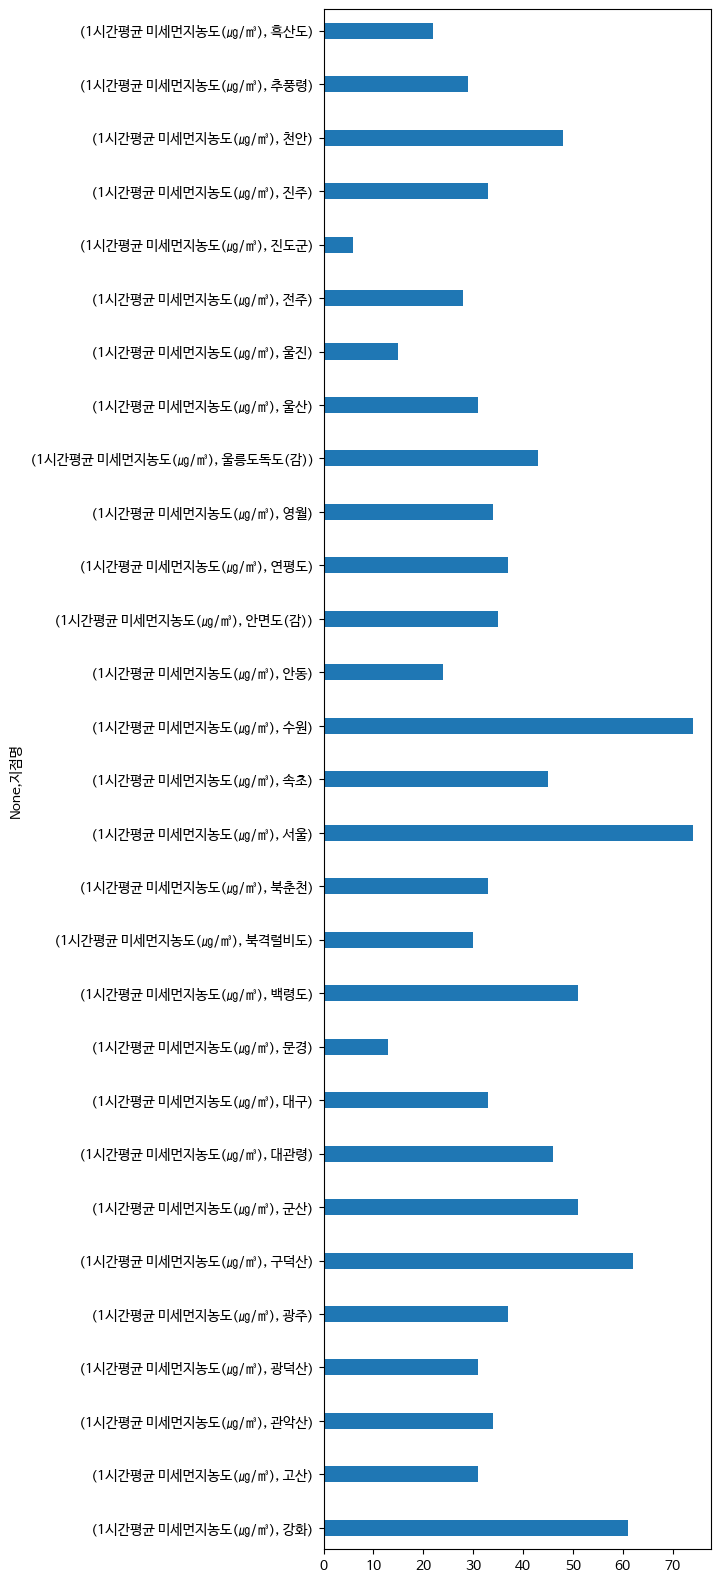

In [111]:
#결측치 제거
d22 = dust22_pivot.fillna(method='bfill')
#2019년 4월 05일 13시 미세먼지 농도 그래프
d22.loc['2022-04-05 13:00'].plot.barh(width=0.3, figsize=(5,20))



---
#공공데이터

In [118]:
movie = pd.read_csv('/content/drive/MyDrive/movie_data.csv',encoding='cp949')

In [145]:
movie

,Unnamed: 0,title,director,distributor,distributor_group,release_date,release_season,nation,screen,rev_nationwide,...,expert_rating,sequel,original,actor_power,before_news,after_news,holiday,dist_cat,audience_rating,rating_audiences
0,0,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니컴퍼니코리아(주),B,20150423,spring,미국,1843,8.858259e+10,...,6.92,1,0,33074337,4120,1940,0,B,8.612377,5268
1,1,국제시장,윤제균,씨제이이앤엠(주),A,20141217,winter,한국,966,6.982389e+10,...,5.81,0,0,51592007,1547,917,0,A,9.272091,1143
2,2,킹스맨 : 시크릿 에이전트,매튜 본,이십세기폭스코리아(주),B,20150211,winter,미국,706,5.033364e+10,...,7.58,1,0,6557445,427,384,0,B,8.960784,918
3,3,쥬라기 월드,콜린 트레보로우,유니버설픽쳐스인터내셔널 코리아(유),B,20150611,summer,미국,1290,4.013081e+10,...,6.63,0,1,1472533,209,668,0,B,8.337789,1945
4,4,조선명탐정 : 사라진 놉의 딸,김석윤,(주)쇼박스,C,20150211,winter,한국,811,3.045688e+10,...,5.85,1,0,58897340,985,621,0,A,8.172131,610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1110,완벽한 가족,로저 미첼,(주)제이앤씨미디어그룹,D,20210106,winter,미국,318,7.538846e+07,...,6.00,0,1,77326,60,100,0,C,6.666667,3
1111,1111,유다 그리고 블랙 메시아,샤카 킹,워너브러더스 코리아(주),B,20210422,spring,미국,154,7.538133e+07,...,7.20,0,0,6242928,30,100,0,B,7.875000,8
1112,1112,이번엔 잘 되겠지,이승수,THE 픽쳐스,D,20210708,summer,한국,48,6.992300e+07,...,0.00,0,0,0,20,20,0,C,4.000000,1
1113,1113,"좋은 빛, 좋은 공기",임흥순,(주)엣나인필름,D,20210428,spring,한국,62,6.668359e+07,...,7.00,0,0,0,10,4,0,C,8.454545,11


- melt

In [151]:
movie_melt= movie.melt(id_vars=['title','nation'],value_vars=['release_season','screen','audience_rating','rating_audiences'])
mm = movie_melt
mm

,title,nation,variable,value
0,어벤져스: 에이지 오브 울트론,미국,release_season,spring
1,국제시장,한국,release_season,winter
2,킹스맨 : 시크릿 에이전트,미국,release_season,winter
3,쥬라기 월드,미국,release_season,summer
4,조선명탐정 : 사라진 놉의 딸,한국,release_season,winter
...,...,...,...,...
4455,완벽한 가족,미국,rating_audiences,3
4456,유다 그리고 블랙 메시아,미국,rating_audiences,8
4457,이번엔 잘 되겠지,한국,rating_audiences,1
4458,"좋은 빛, 좋은 공기",한국,rating_audiences,11


In [152]:
mm['variable'].unique()

array(['release_season', 'screen', 'audience_rating', 'rating_audiences'],
      dtype=object)

- 미세먼지가 많은 봄에 개봉한 영화는?

In [153]:
mm[mm['value']=='spring']

,title,nation,variable,value
0,어벤져스: 에이지 오브 울트론,미국,release_season,spring
5,매드 맥스: 분노의 도로,미국,release_season,spring
6,분노의 질주: 더 세븐,미국,release_season,spring
7,스물,한국,release_season,spring
10,스파이,미국,release_season,spring
...,...,...,...,...
1105,정말 먼 곳,한국,release_season,spring
1108,슈퍼노바,영국,release_season,spring
1109,타인의 친절,영국,release_season,spring
1111,유다 그리고 블랙 메시아,미국,release_season,spring


- 미세먼지가 많은 봄에 개봉한 영화 중 한국영화는?

In [154]:
mm[(mm['value']=='spring')&(mm['nation']=='한국')]

,title,nation,variable,value
7,스물,한국,release_season,spring
12,악의 연대기,한국,release_season,spring
21,차이나타운,한국,release_season,spring
22,장수상회,한국,release_season,spring
23,간신,한국,release_season,spring
...,...,...,...,...
1049,아무도 없는 곳,한국,release_season,spring
1056,아이들은 즐겁다,한국,release_season,spring
1084,혼자 사는 사람들,한국,release_season,spring
1105,정말 먼 곳,한국,release_season,spring


- 봄에 개봉한 한국영화의 관객 평점은 얼마이고 가장 큰 평점 값과 가장 관객수가 많았던 영화는?

In [157]:
movie_melt1= movie.melt(id_vars=['title','nation','release_season'],value_vars=['screen','audience_rating','rating_audiences'])
mm1 = movie_melt1
mm1

,title,nation,release_season,variable,value
0,어벤져스: 에이지 오브 울트론,미국,spring,screen,1843.0
1,국제시장,한국,winter,screen,966.0
2,킹스맨 : 시크릿 에이전트,미국,winter,screen,706.0
3,쥬라기 월드,미국,summer,screen,1290.0
4,조선명탐정 : 사라진 놉의 딸,한국,winter,screen,811.0
...,...,...,...,...,...
3340,완벽한 가족,미국,winter,rating_audiences,3.0
3341,유다 그리고 블랙 메시아,미국,spring,rating_audiences,8.0
3342,이번엔 잘 되겠지,한국,summer,rating_audiences,1.0
3343,"좋은 빛, 좋은 공기",한국,spring,rating_audiences,11.0


In [158]:
mm1[(mm1['release_season']=='spring')&(mm1['nation']=='한국')&(mm1['variable']=='audience_rating')]

,title,nation,release_season,variable,value
1122,스물,한국,spring,audience_rating,8.779516
1127,악의 연대기,한국,spring,audience_rating,8.428094
1136,차이나타운,한국,spring,audience_rating,7.491289
1137,장수상회,한국,spring,audience_rating,8.677725
1138,간신,한국,spring,audience_rating,7.268542
...,...,...,...,...,...
2164,아무도 없는 곳,한국,spring,audience_rating,8.333333
2171,아이들은 즐겁다,한국,spring,audience_rating,9.111111
2199,혼자 사는 사람들,한국,spring,audience_rating,8.571429
2220,정말 먼 곳,한국,spring,audience_rating,8.611111


In [159]:
mm1[(mm1['release_season']=='spring')&(mm1['nation']=='한국')&(mm1['variable']=='audience_rating')].max()

title                          화장
nation                         한국
release_season             spring
variable          audience_rating
value                        10.0
dtype: object

In [160]:
mm1[(mm1['release_season']=='spring')&(mm1['nation']=='한국')&(mm1['variable']=='rating_audiences')].max()

title                           화장
nation                          한국
release_season              spring
variable          rating_audiences
value                       5173.0
dtype: object

<Axes: >

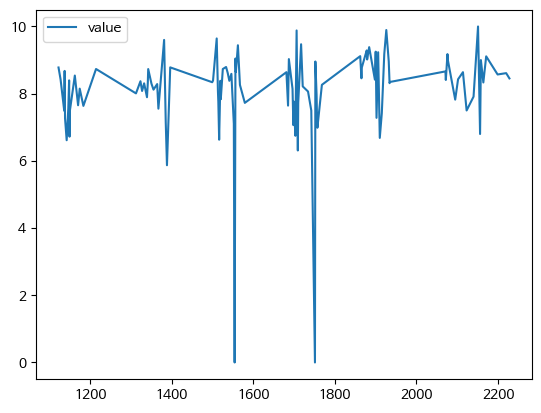

In [177]:
mm1_g = mm1[(mm1['release_season']=='spring')&(mm1['nation']=='한국')&(mm1['variable']=='audience_rating')]
mm1_g.plot()
#mm1_g.plot.barh(x=mm1_g['value'],y=mm1_g['title'],width=0.3, figsize=(5,20))

- 계절별 가장 관객수가 많은 영화는?

In [161]:
movie_melt2= movie.melt(id_vars=['title','nation','release_season'],value_vars=['screen','audience_rating','rating_audiences'])
mm2 = movie_melt2
mm2

,title,nation,release_season,variable,value
0,어벤져스: 에이지 오브 울트론,미국,spring,screen,1843.0
1,국제시장,한국,winter,screen,966.0
2,킹스맨 : 시크릿 에이전트,미국,winter,screen,706.0
3,쥬라기 월드,미국,summer,screen,1290.0
4,조선명탐정 : 사라진 놉의 딸,한국,winter,screen,811.0
...,...,...,...,...,...
3340,완벽한 가족,미국,winter,rating_audiences,3.0
3341,유다 그리고 블랙 메시아,미국,spring,rating_audiences,8.0
3342,이번엔 잘 되겠지,한국,summer,rating_audiences,1.0
3343,"좋은 빛, 좋은 공기",한국,spring,rating_audiences,11.0


In [162]:
mm2['release_season'].unique()

array(['spring', 'winter', 'summer', 'autumn'], dtype=object)

In [163]:
mm_spring = mm2[(mm2['release_season']=='spring')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].max()
mm_summer = mm2[(mm2['release_season']=='summer')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].max()
mm_autumn = mm2[(mm2['release_season']=='autumn')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].max()
mm_winter = mm2[(mm2['release_season']=='winter')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].max()

print(mm_spring)
print(mm_summer)
print(mm_autumn)
print(mm_winter)


title                           화장
nation                          한국
release_season              spring
variable          rating_audiences
value                       5173.0
dtype: object
title                    협녀, 칼의 기억
nation                          한국
release_season              summer
variable          rating_audiences
value                      11847.0
dtype: object
title                 힘을 내요, 미스터 리
nation                          한국
release_season              autumn
variable          rating_audiences
value                       6145.0
dtype: object
title                         히말라야
nation                          한국
release_season              winter
variable          rating_audiences
value                       9080.0
dtype: object


In [191]:
mm_spring_count = mm2[(mm2['release_season']=='spring')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].count()
mm_summer_count = mm2[(mm2['release_season']=='summer')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].count()
mm_autumn_count = mm2[(mm2['release_season']=='autumn')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].count()
mm_winter_count = mm2[(mm2['release_season']=='winter')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].count()

print(mm_spring_count['value'])
print(mm_summer_count['value'])
print(mm_autumn_count['value'])
print(mm_winter_count['value'])


105
91
104
99


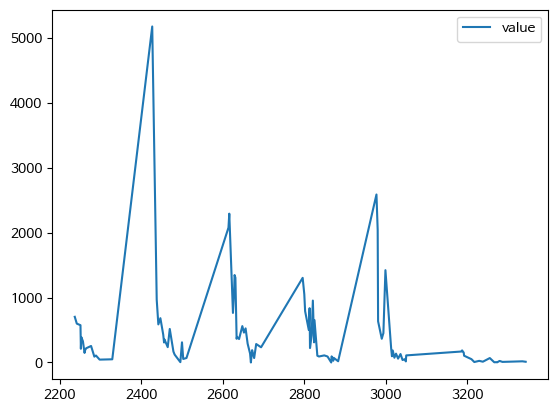

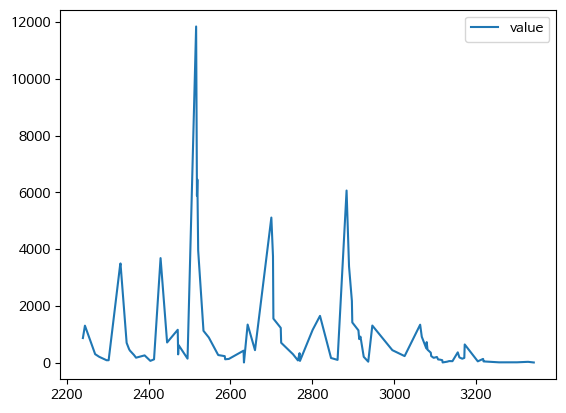

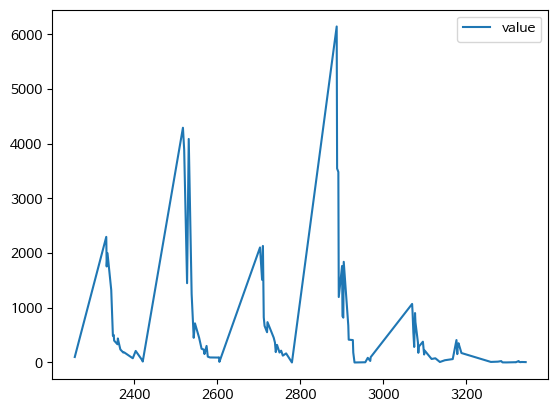

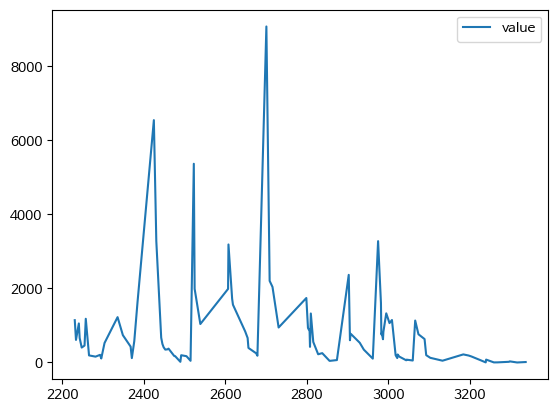

In [186]:
mm_spring = mm2[(mm2['release_season']=='spring')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].plot()
mm_summer = mm2[(mm2['release_season']=='summer')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].plot()
mm_autumn = mm2[(mm2['release_season']=='autumn')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].plot()
mm_winter = mm2[(mm2['release_season']=='winter')&(mm2['nation']=='한국')&(mm2['variable']=='rating_audiences')].plot()


- 미세먼지&계절과 영화 평점, 관람객 수는 상관관계가 없을 수 있지만, 계절별 개봉한 영화 수를 보면 봄과 가을에 많이 개봉한 것을 볼 수 있다.



---



- pivot

In [192]:
movie

,Unnamed: 0,title,director,distributor,distributor_group,release_date,release_season,nation,screen,rev_nationwide,...,expert_rating,sequel,original,actor_power,before_news,after_news,holiday,dist_cat,audience_rating,rating_audiences
0,0,어벤져스: 에이지 오브 울트론,조스 웨던,월트디즈니컴퍼니코리아(주),B,20150423,spring,미국,1843,8.858259e+10,...,6.92,1,0,33074337,4120,1940,0,B,8.612377,5268
1,1,국제시장,윤제균,씨제이이앤엠(주),A,20141217,winter,한국,966,6.982389e+10,...,5.81,0,0,51592007,1547,917,0,A,9.272091,1143
2,2,킹스맨 : 시크릿 에이전트,매튜 본,이십세기폭스코리아(주),B,20150211,winter,미국,706,5.033364e+10,...,7.58,1,0,6557445,427,384,0,B,8.960784,918
3,3,쥬라기 월드,콜린 트레보로우,유니버설픽쳐스인터내셔널 코리아(유),B,20150611,summer,미국,1290,4.013081e+10,...,6.63,0,1,1472533,209,668,0,B,8.337789,1945
4,4,조선명탐정 : 사라진 놉의 딸,김석윤,(주)쇼박스,C,20150211,winter,한국,811,3.045688e+10,...,5.85,1,0,58897340,985,621,0,A,8.172131,610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1110,완벽한 가족,로저 미첼,(주)제이앤씨미디어그룹,D,20210106,winter,미국,318,7.538846e+07,...,6.00,0,1,77326,60,100,0,C,6.666667,3
1111,1111,유다 그리고 블랙 메시아,샤카 킹,워너브러더스 코리아(주),B,20210422,spring,미국,154,7.538133e+07,...,7.20,0,0,6242928,30,100,0,B,7.875000,8
1112,1112,이번엔 잘 되겠지,이승수,THE 픽쳐스,D,20210708,summer,한국,48,6.992300e+07,...,0.00,0,0,0,20,20,0,C,4.000000,1
1113,1113,"좋은 빛, 좋은 공기",임흥순,(주)엣나인필름,D,20210428,spring,한국,62,6.668359e+07,...,7.00,0,0,0,10,4,0,C,8.454545,11


- 계절 & 개봉 국가 영화별 관객 평점 평균

In [196]:
movie.pivot_table(index=['release_season'],columns=['nation'],values=['audience_rating'],aggfunc=np.mean)

audience_rating                                          \
nation                      기타        미국        영국        일본       프랑스   
release_season                                                           
autumn                8.191168  8.044516  7.607031  7.596987  8.286827   
spring                8.245763  8.335412  8.264444  8.888094  7.799369   
summer                7.914739  7.997248  7.903696  8.539859  8.621552   
winter                8.451177  8.237947  8.364635  7.647524  8.153897   

                          
nation                한국  
release_season            
autumn          8.108731  
spring          8.097662  
summer          8.075350  
winter          8.323474

<Axes: xlabel='release_season'>

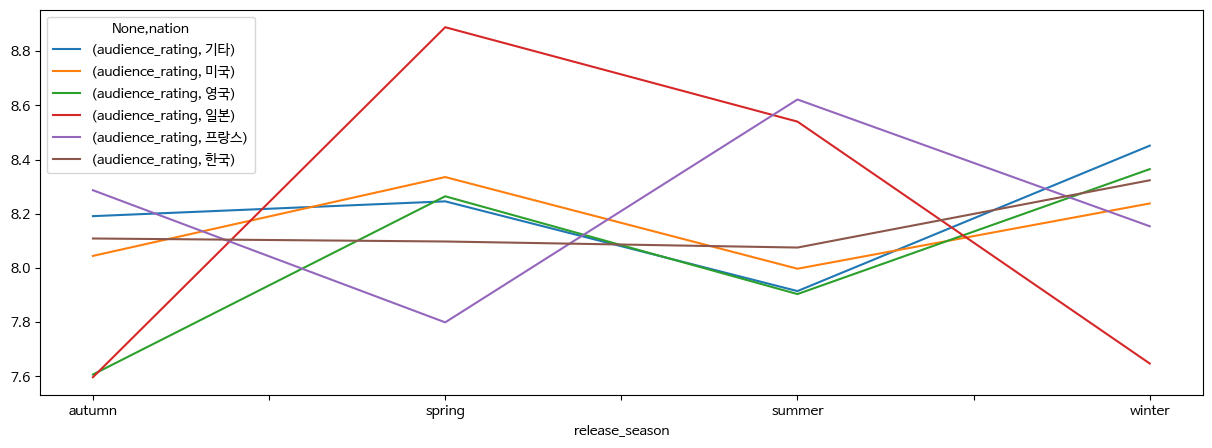

In [198]:
movie.pivot_table(index=['release_season'],columns=['nation'],values=['audience_rating'],aggfunc=np.mean).plot(figsize=(15,5))

- 계절 & 개봉 국가 영화별 관객수 합

In [199]:
movie.pivot_table(index=['release_season'],columns=['nation'],values=['rating_audiences'],aggfunc=np.sum)

rating_audiences                                  
nation                       기타      미국    영국     일본   프랑스     한국
release_season                                                   
autumn                     1050   56817  2066   2728   585  69122
spring                     1933  106287   587   1415   247  44595
summer                      833   86413   940   5993   551  93992
winter                     2864   61836  3544  11705  1633  85986

<Axes: xlabel='release_season'>

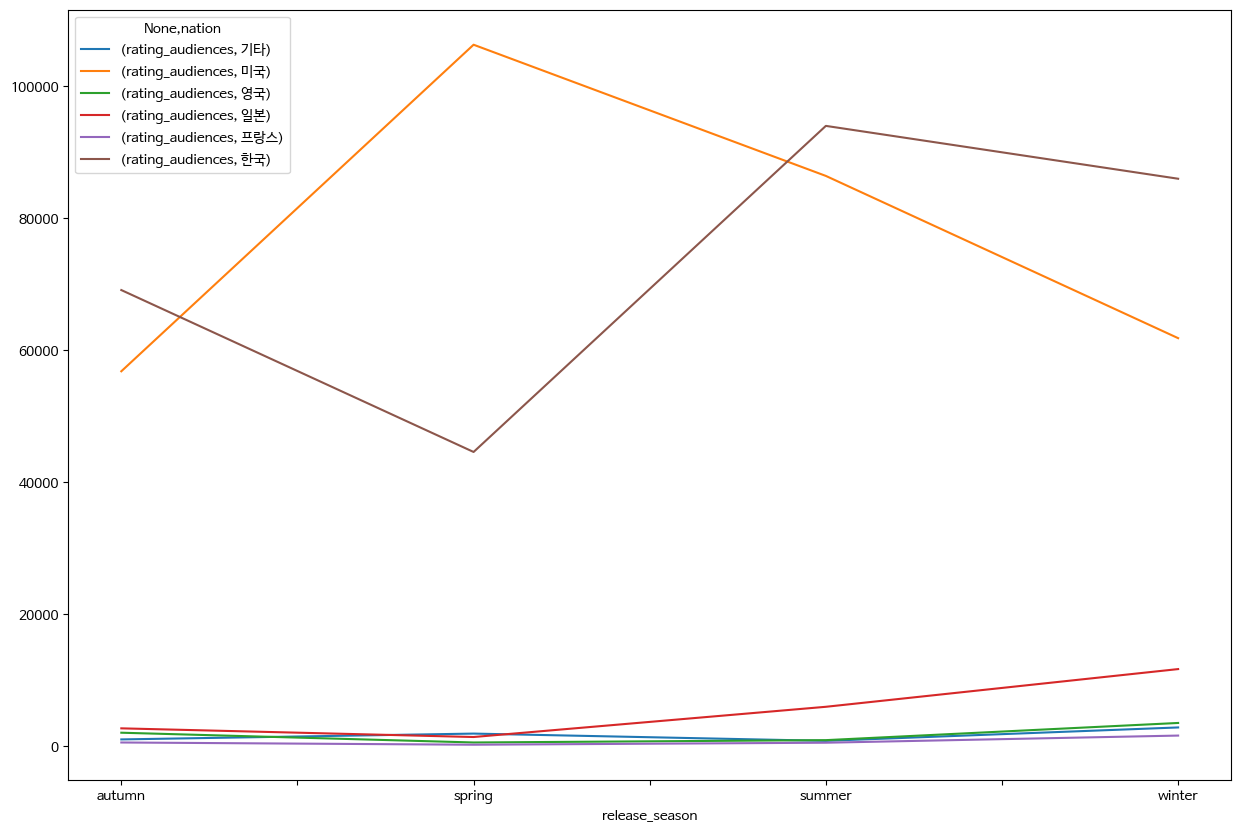

In [202]:
movie.pivot_table(index=['release_season'],columns=['nation'],values=['rating_audiences'],aggfunc=np.sum).plot(figsize=(15,10))

- 계절&국가&스크린수에 따른 영화 관람객 수

In [208]:
movie.pivot_table(index=['release_season','nation'],columns=['screen'],values=['rating_audiences'])

rating_audiences                                         \
screen                            25    28    37    38   47   48   51    53     
release_season nation                                                           
autumn         기타                  NaN   NaN  27.0   NaN  NaN  NaN  NaN   NaN   
               미국                  NaN   NaN   NaN  58.0  NaN  NaN  NaN   NaN   
               영국                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               일본                  NaN  42.0   NaN   NaN  NaN  NaN  NaN   NaN   
               프랑스                 NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               한국                  9.0   NaN   NaN   NaN  0.0  NaN  NaN   NaN   
spring         기타                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               미국                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               영국                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               일본                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               프랑스                 NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               한국                  NaN   NaN   NaN   NaN  NaN  NaN  5.0   NaN   
summer         기타                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               미국                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               영국                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               일본                  NaN   NaN   NaN   NaN  NaN  NaN  NaN  26.0   
               프랑스                 NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               한국                  NaN   NaN   NaN   NaN  NaN  1.0  NaN   NaN   
winter         기타                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               미국                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               영국                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               일본                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               프랑스                 NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   
               한국                  NaN   NaN   NaN   NaN  NaN  NaN  NaN   NaN   

                                    ...                                        \
screen                 54     55    ...    2100    2142   2201    2235   2297   
release_season nation               ...                                         
autumn         기타      10.0    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               미국       NaN    NaN  ...     NaN     NaN  234.0     NaN    NaN   
               영국       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               일본       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               프랑스      NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               한국       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
spring         기타       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               미국       NaN    NaN  ...  4745.0     NaN    NaN     NaN  768.0   
               영국       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               일본       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               프랑스      NaN   32.0  ...     NaN     NaN    NaN     NaN    NaN   
               한국       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
summer         기타       7.0    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               미국       NaN    NaN  ...     NaN  1645.0    NaN     NaN    NaN   
               영국       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               일본       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               프랑스      NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               한국       NaN    NaN  ...     NaN     NaN    NaN  6063.0    NaN   
winter         기타       NaN    NaN  ...     NaN     NaN    NaN     NaN    NaN   
               미국       NaN    NaN  ...     NaN     

- 계절&국가에 따른 가장 큰 스크린수 값

In [210]:
movie.pivot_table(index=['release_season'],columns=['nation'],values=['screen'],aggfunc=np.max)

screen                            
nation             기타    미국    영국   일본  프랑스    한국
release_season                                   
autumn            469  2648  1105  716  542  1540
spring            691  2835   597  844  349  1948
summer            437  2528   733  602  629  2235
winter            617  2948   891  947  629  1978

<Axes: xlabel='release_season'>

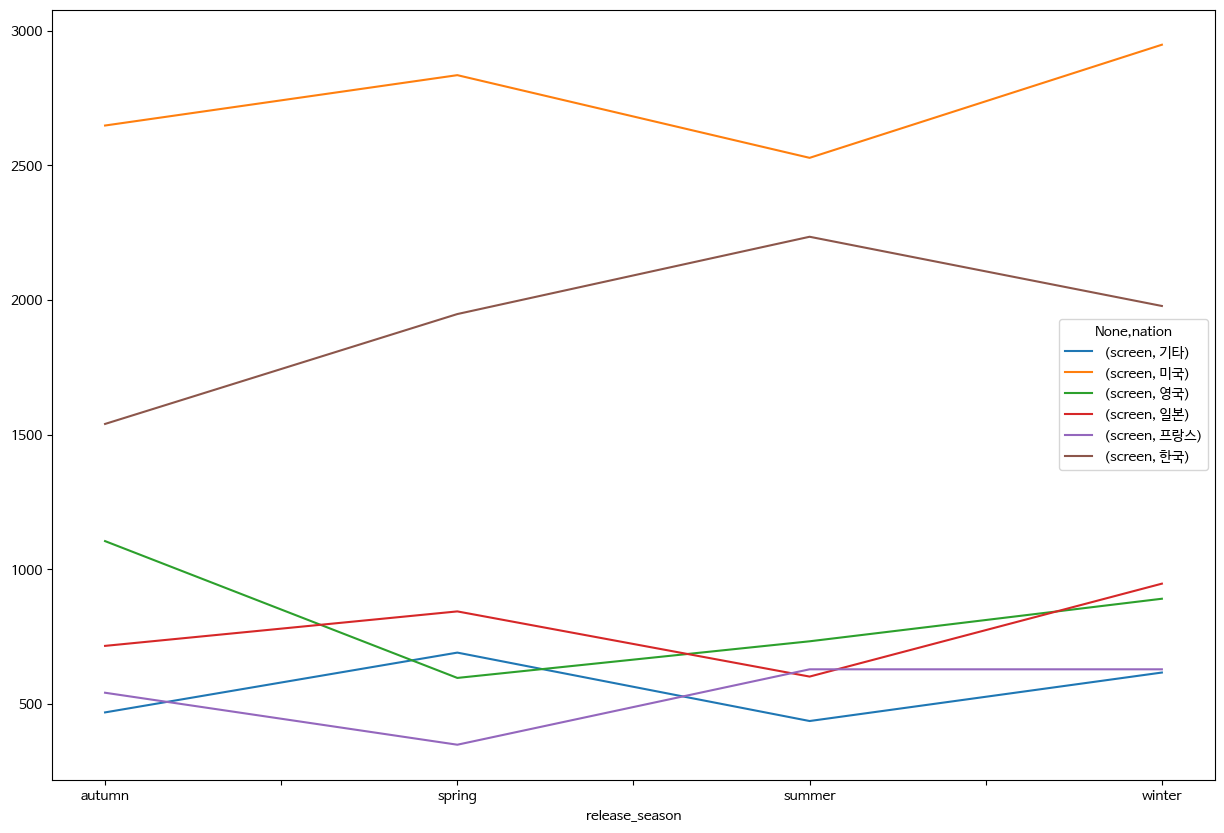

In [211]:
movie.pivot_table(index=['release_season'],columns=['nation'],values=['screen'],aggfunc=np.max).plot(figsize=(15,10))

- 미국과 한국의 계절별 영화 관객 평점 평균과 최댓값

In [222]:
movie.query('nation==["한국","미국"]').pivot_table(index=['release_season'],columns=['nation'],values=['audience_rating'],aggfunc=[np.mean,np.max])

mean                      amax           
               audience_rating           audience_rating           
nation                      미국        한국              미국         한국
release_season                                                     
autumn                8.044516  8.108731       10.000000   9.777108
spring                8.335412  8.097662        9.545181  10.000000
summer                7.997248  8.075350        9.782609  10.000000
winter                8.237947  8.323474        9.733333   9.521487

<Axes: xlabel='release_season'>

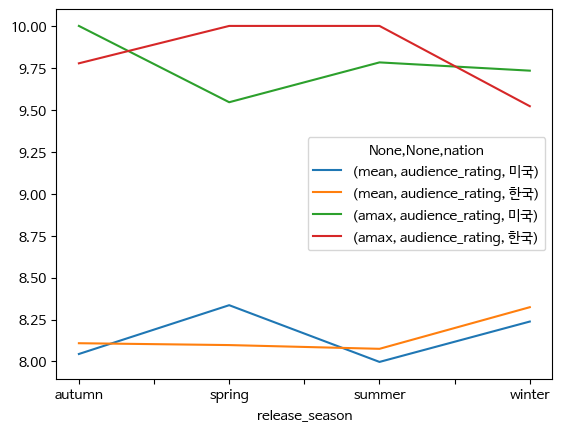

In [223]:
movie.query('nation==["한국","미국"]').pivot_table(index=['release_season'],columns=['nation'],values=['audience_rating'],aggfunc=[np.mean,np.max]).plot()

- 미국과 한국의 계절별 영화 관객 수 평균과 최댓값

In [225]:
movie.query('nation==["한국","미국"]').pivot_table(index=['release_season'],columns=['nation'],values=['rating_audiences'],aggfunc=[np.mean,np.max])

mean                          amax       
               rating_audiences              rating_audiences       
nation                       미국           한국               미국     한국
release_season                                                      
autumn               502.805310   664.634615             4814   6145
spring               993.336449   424.714286            24610   5173
summer               751.417391  1032.879121             5423  11847
winter               461.462687   868.545455             2573   9080

<Axes: xlabel='release_season'>

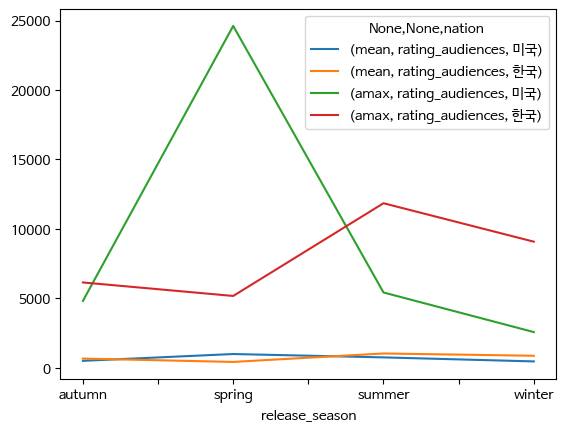

In [226]:
movie.query('nation==["한국","미국"]').pivot_table(index=['release_season'],columns=['nation'],values=['rating_audiences'],aggfunc=[np.mean,np.max]).plot()

- 미국과 한국의 계절별 영화 스크린 수 평균과 최댓값

In [227]:
movie.query('nation==["한국","미국"]').pivot_table(index=['release_season'],columns=['nation'],values=['screen'],aggfunc=[np.mean,np.max])

mean               amax      
                    screen             screen      
nation                  미국          한국     미국    한국
release_season                                     
autumn          673.787611  692.211538   2648  1540
spring          731.495327  634.619048   2835  1948
summer          702.417391  784.153846   2528  2235
winter          584.216418  760.414141   2948  1978

<Axes: xlabel='release_season'>

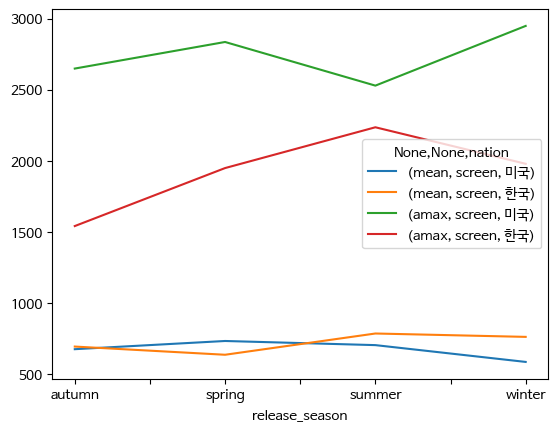

In [228]:
movie.query('nation==["한국","미국"]').pivot_table(index=['release_season'],columns=['nation'],values=['screen'],aggfunc=[np.mean,np.max]).plot()